<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Gasal 2023/2024

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 4: *Cart (Classification)***

###**Tenggat Waktu: 05 Oktober 2024, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: A_Lab1_1806205773_Abdurrafi Arief.ipynb. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 05 Oktober 2024, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam. Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.



In [1]:
# Isi dengan data diri Anda
NAMA = "Alden Luthfi"
KELAS = "A"
NPM = "2206028932"
USERNAME_KAGGLE = "aldenluthfi"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [2]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Alden Luthfi dari kelas A dengan NPM 2206028932, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Alden Luthfi)


# Deskripsi Dataset

Dataset klasifikasi didapatkan dari : https://www.kaggle.com/datasets/nikhil7280/weather-type-classification

Berikut merupakan penjelasan fitur dan target variabel :
- Temperature (numeric): The temperature in degrees Celsius, ranging from extreme cold to extreme heat.
- Humidity (numeric): The humidity percentage, including values above 100% to introduce outliers.
- Wind Speed (numeric): The wind speed in kilometers per hour, with a range including unrealistically high values.
- Precipitation (%) (numeric): The precipitation percentage, including outlier values.
- Cloud Cover (categorical): The cloud cover description.
- Atmospheric Pressure (numeric): The atmospheric pressure in hPa, covering a wide range.
- UV Index (numeric): The UV index, indicating the strength of ultraviolet radiation.
- Season (categorical): The season during which the data was recorded.
- Visibility (km) (numeric): The visibility in kilometers, including very low or very high values.
- Location (categorical): The type of location where the data was recorded.
- Weather Type (categorical): The target variable for classification, indicating the weather type.

Dataset regresi didapatkan dari : https://www.kaggle.com/datasets/mohansacharya/graduate-admissions

Berikut merupakan penjelasan fitur dan target variabel :
- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )

# Import Libraries

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import seaborn as sns

# Read Dataset

In [4]:
df = pd.read_csv("weather_train.csv")
df

,ID,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,W9972,23.0,69,9.5,10.0,clear,1012.91,9,Spring,8.5,inland,Sunny
1,W501,29.0,82,18.0,78.0,overcast,991.54,3,Spring,4.0,inland,Rainy
2,W9187,-2.0,74,3.0,74.0,overcast,982.42,0,Winter,2.5,inland,Snowy
3,W6418,36.0,48,3.5,11.0,partly cloudy,1024.92,10,Autumn,5.5,mountain,Sunny
4,W5603,32.0,35,5.5,9.0,partly cloudy,1010.24,6,Summer,9.0,coastal,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...
11215,W6427,75.0,70,35.5,99.0,overcast,1019.26,5,Spring,6.5,mountain,Cloudy
11216,W4741,44.0,53,8.5,18.0,clear,1023.11,5,Autumn,9.5,coastal,Sunny
11217,W6885,22.0,80,13.5,75.0,overcast,1019.13,0,Summer,2.5,mountain,Rainy
11218,W7829,33.0,52,9.5,34.0,overcast,1001.71,4,Autumn,7.0,inland,Cloudy


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11220 entries, 0 to 11219
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    11220 non-null  object 
 1   Temperature           11220 non-null  float64
 2   Humidity              11220 non-null  int64  
 3   Wind Speed            11220 non-null  float64
 4   Precipitation (%)     11220 non-null  float64
 5   Cloud Cover           11220 non-null  object 
 6   Atmospheric Pressure  11220 non-null  float64
 7   UV Index              11220 non-null  int64  
 8   Season                11220 non-null  object 
 9   Visibility (km)       11220 non-null  float64
 10  Location              11220 non-null  object 
 11  Weather Type          11220 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 1.0+ MB


In [6]:
df_r = pd.read_csv("Admission_Predict_Ver1.1.csv")
df_r

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [7]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# Preprocessing

Sebenarnya decision tree dan random forest dapat menangani fitur kategorikal tetapi untuk implementasi yang ada pada library sklearn fitur-fitur kategorikal tersebut harus diubah terlebih dahulu menjadi angka. Oleh karena itu, preprocessing yang dilakukan adalah dengan meng-convert fitur kategorikal menjadi numerik.

In [8]:
le = LabelEncoder()

categorical_columns = ['Cloud Cover', 'Season', 'Location']

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

df

,ID,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,W9972,23.0,69,9.5,10.0,0,1012.91,9,1,8.5,1,Sunny
1,W501,29.0,82,18.0,78.0,2,991.54,3,1,4.0,1,Rainy
2,W9187,-2.0,74,3.0,74.0,2,982.42,0,3,2.5,1,Snowy
3,W6418,36.0,48,3.5,11.0,3,1024.92,10,0,5.5,2,Sunny
4,W5603,32.0,35,5.5,9.0,3,1010.24,6,2,9.0,0,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...
11215,W6427,75.0,70,35.5,99.0,2,1019.26,5,1,6.5,2,Cloudy
11216,W4741,44.0,53,8.5,18.0,0,1023.11,5,0,9.5,0,Sunny
11217,W6885,22.0,80,13.5,75.0,2,1019.13,0,2,2.5,2,Rainy
11218,W7829,33.0,52,9.5,34.0,2,1001.71,4,0,7.0,1,Cloudy


# Split Dataset

In [9]:
df

,ID,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,W9972,23.0,69,9.5,10.0,0,1012.91,9,1,8.5,1,Sunny
1,W501,29.0,82,18.0,78.0,2,991.54,3,1,4.0,1,Rainy
2,W9187,-2.0,74,3.0,74.0,2,982.42,0,3,2.5,1,Snowy
3,W6418,36.0,48,3.5,11.0,3,1024.92,10,0,5.5,2,Sunny
4,W5603,32.0,35,5.5,9.0,3,1010.24,6,2,9.0,0,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...
11215,W6427,75.0,70,35.5,99.0,2,1019.26,5,1,6.5,2,Cloudy
11216,W4741,44.0,53,8.5,18.0,0,1023.11,5,0,9.5,0,Sunny
11217,W6885,22.0,80,13.5,75.0,2,1019.13,0,2,2.5,2,Rainy
11218,W7829,33.0,52,9.5,34.0,2,1001.71,4,0,7.0,1,Cloudy


In [10]:
X = df.drop(columns=['Weather Type', 'ID'], axis=1)
y = df['Weather Type']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 42)

In [12]:
df_r

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [13]:
X_r = df_r.drop(columns=['Chance of Admit '], axis=1)
y_r = df_r['Chance of Admit ']

In [14]:
X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X_r, y_r, test_size = 0.8, random_state = 42)

# Metrics Evaluasi

Fungsi dibawah ini berguna untuk menghitung metrics yang dapat digunakan untuk mengukur kesesuaian model yang dibuat. Perlu diingat bahwa fungsi dibawah hanya dapat digunakan untuk model klasifikasi multi-class. PERLU DIINGAT FUNGSI INI DIGUNAKAN UNTUK KLASIFIKASI MULTI-CLASS BUKAN BINARY.

In [15]:
def classification_metrics(prediction, y_test):
  accuracy = accuracy_score(y_test, prediction)
  f1 = f1_score(y_test, prediction, average="macro")
  recall = recall_score(y_test, prediction, average="macro")
  precision = precision_score(y_test, prediction, average="macro")

  print('Accuracy: ' + str(accuracy))
  print('F1 Score: ' + str(f1))
  print('Recall Score: ' + str(recall))
  print('Precision Score: ' + str(precision))

Untuk dibawah merupakan fungsi yang dapat digunakan untuk menghitung metrics pada permasalahan regresi


In [16]:
def regression_metrics(prediction, y_test):
    MAE = mean_absolute_error(y_test, prediction)
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)

    print('MAE: ' + str(MAE))
    print('MSE: ' + str(MSE))
    print('RMSE: ' + str(RMSE))

# Decision Tree (Classification)

Berikut merupakan cara membuat decision tree (classification) dengan menggunakan library sklearn. Contoh dibawah tidak menggunakan hyperparameter. Untuk mengetahui penjelasan hyperparameter, anda dapat mengunjungi laman ini : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [17]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

# Evaluation Decision Tree (Classification)

## Training Dataset

In [18]:
dt_prediction_train = dt.predict(X_train)

classification_metrics(dt_prediction_train, y_train)

Accuracy: 1.0
F1 Score: 1.0
Recall Score: 1.0
Precision Score: 1.0


## Testing Dataset

In [19]:
dt_prediction_test = dt.predict(X_test)

classification_metrics(dt_prediction_test, y_test)

Accuracy: 0.8988413547237076
F1 Score: 0.8988122838794581
Recall Score: 0.8988318506963939
Precision Score: 0.8993295510208628


# Random Forest (Classification)

Berikut merupakan cara membuat random forest (classification) dengan menggunakan library sklearn. Untuk contoh dibawah, tidak menggunakan hyperparameter. Untuk mengetahui penjelasan hyperparameter, anda dapat mengunjungi laman ini : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [20]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

# Evaluation Random Forest (Classification)

## Training Dataset

In [21]:
rf_prediction_train = rf.predict(X_train)

classification_metrics(rf_prediction_train, y_train)

Accuracy: 1.0
F1 Score: 1.0
Recall Score: 1.0
Precision Score: 1.0


## Testing Dataset

In [22]:
rf_prediction_test = rf.predict(X_test)

classification_metrics(rf_prediction_test, y_test)

Accuracy: 0.9124331550802139
F1 Score: 0.9127782258520296
Recall Score: 0.9125190518073836
Precision Score: 0.9146461407594821


# Decision Tree (Regression)

In [23]:
dt_r = DecisionTreeRegressor()
dt_r.fit(X_r_train, y_r_train)

DecisionTreeRegressor()

# Evaluation Decision Tree (Regression)

## Training Dataset

In [24]:
dt_r_prediction_train = dt_r.predict(X_r_train)

regression_metrics(dt_r_prediction_train, y_r_train)

MAE: 0.0
MSE: 0.0
RMSE: 0.0


## Testing Dataset

In [25]:
dt_r_prediction_test = dt_r.predict(X_r_test)

regression_metrics(dt_r_prediction_test, y_r_test)

MAE: 0.056499999999999995
MSE: 0.0060255000000000005
RMSE: 0.07762409419761367


# Random Forest (Regression)

In [26]:
rf_r = DecisionTreeRegressor()
rf_r.fit(X_r_train, y_r_train)

DecisionTreeRegressor()

## Training Dataset

In [27]:
rf_r_prediction_train = rf_r.predict(X_r_train)

regression_metrics(rf_r_prediction_train, y_r_train)

MAE: 0.0
MSE: 0.0
RMSE: 0.0


## Testing Dataset

In [28]:
rf_r_prediction_test = rf_r.predict(X_r_test)

regression_metrics(rf_r_prediction_test, y_r_test)

MAE: 0.058725
MSE: 0.0065407500000000006
RMSE: 0.08087490340025143


# Latihan Soal

## No. 1

**PERHATIAN UNTUK KODE DIBAWAH JANGAN DIUBAH**

In [29]:
# KODE INI JANGAN DIUBAH
df = pd.read_csv("weather_train.csv")
df
# KODE INI JANGAN DIUBAH

,ID,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,W9972,23.0,69,9.5,10.0,clear,1012.91,9,Spring,8.5,inland,Sunny
1,W501,29.0,82,18.0,78.0,overcast,991.54,3,Spring,4.0,inland,Rainy
2,W9187,-2.0,74,3.0,74.0,overcast,982.42,0,Winter,2.5,inland,Snowy
3,W6418,36.0,48,3.5,11.0,partly cloudy,1024.92,10,Autumn,5.5,mountain,Sunny
4,W5603,32.0,35,5.5,9.0,partly cloudy,1010.24,6,Summer,9.0,coastal,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...
11215,W6427,75.0,70,35.5,99.0,overcast,1019.26,5,Spring,6.5,mountain,Cloudy
11216,W4741,44.0,53,8.5,18.0,clear,1023.11,5,Autumn,9.5,coastal,Sunny
11217,W6885,22.0,80,13.5,75.0,overcast,1019.13,0,Summer,2.5,mountain,Rainy
11218,W7829,33.0,52,9.5,34.0,overcast,1001.71,4,Autumn,7.0,inland,Cloudy


### **1.a Preprocessing**


Preprocessing dengan membuat kolum-kolum kategorikal menjadi numerikal dengan ketentuan seperti berikut :

i. Cloud Cover
*   clear -> 0
*   partly cloudy -> 1
*   cloudy -> 2
*   overcast -> 3

ii. Season
*   Winter -> 0
*   Spring -> 1
*   Summer -> 2
*   Autumn -> 3

iii. Location
*   coastal -> 0
*   inland -> 1
*   mountain -> 2


In [30]:
# Jawab Disini

categorical_columns = {
    'Cloud Cover': {'clear': 0, 'partly cloudy': 1, 'cloudy': 2, 'overcast': 3},
    'Season': {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3},
    'Location': {'coastal': 0, 'inland': 1, 'mountain': 2}
}


for col in categorical_columns:
    df[col] = df[col].map(dict(categorical_columns[col]))

df

,ID,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,W9972,23.0,69,9.5,10.0,0,1012.91,9,1,8.5,1,Sunny
1,W501,29.0,82,18.0,78.0,3,991.54,3,1,4.0,1,Rainy
2,W9187,-2.0,74,3.0,74.0,3,982.42,0,0,2.5,1,Snowy
3,W6418,36.0,48,3.5,11.0,1,1024.92,10,3,5.5,2,Sunny
4,W5603,32.0,35,5.5,9.0,1,1010.24,6,2,9.0,0,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...
11215,W6427,75.0,70,35.5,99.0,3,1019.26,5,1,6.5,2,Cloudy
11216,W4741,44.0,53,8.5,18.0,0,1023.11,5,3,9.5,0,Sunny
11217,W6885,22.0,80,13.5,75.0,3,1019.13,0,2,2.5,2,Rainy
11218,W7829,33.0,52,9.5,34.0,3,1001.71,4,3,7.0,1,Cloudy


### **1.b Split dataset**

Ketentuan:
*   data target : Weather Type
*   random state : 2024
*   split dengan data testing sebanyak 30%



In [31]:
# Jawab disini
# Split X dan y disini

X = df.drop(columns=['Weather Type', 'ID'], axis=1)
y = df['Weather Type']

display(X)
display(y)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,23.0,69,9.5,10.0,0,1012.91,9,1,8.5,1
1,29.0,82,18.0,78.0,3,991.54,3,1,4.0,1
2,-2.0,74,3.0,74.0,3,982.42,0,0,2.5,1
3,36.0,48,3.5,11.0,1,1024.92,10,3,5.5,2
4,32.0,35,5.5,9.0,1,1010.24,6,2,9.0,0
...,...,...,...,...,...,...,...,...,...,...
11215,75.0,70,35.5,99.0,3,1019.26,5,1,6.5,2
11216,44.0,53,8.5,18.0,0,1023.11,5,3,9.5,0
11217,22.0,80,13.5,75.0,3,1019.13,0,2,2.5,2
11218,33.0,52,9.5,34.0,3,1001.71,4,3,7.0,1


0         Sunny
1         Rainy
2         Snowy
3         Sunny
4         Sunny
          ...  
11215    Cloudy
11216     Sunny
11217     Rainy
11218    Cloudy
11219     Snowy
Name: Weather Type, Length: 11220, dtype: object

In [32]:
# Jawab disini
# Split train dan test disini
Xtrain_c, Xtest_c, ytrain_c, ytest_c = train_test_split(X, y, test_size = 0.3, random_state = 2024)

display(Xtrain_c)
display(ytrain_c)

display(Xtest_c)
display(ytest_c)


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
10971,36.0,63,5.5,17.0,0,1013.88,9,2,8.5,1
5503,27.0,43,7.5,5.0,0,1011.64,8,2,8.0,0
3185,22.0,99,18.5,82.0,1,1012.70,0,2,3.5,1
5004,34.0,89,12.0,62.0,1,1013.20,1,1,2.5,1
2052,36.0,81,8.0,97.0,0,1014.11,10,1,9.5,0
...,...,...,...,...,...,...,...,...,...,...
2494,14.0,81,6.5,82.0,3,1010.85,0,1,2.0,0
2688,11.0,66,6.0,49.0,1,1015.45,3,1,5.0,0
2656,12.0,85,9.5,68.0,3,1018.13,2,3,2.0,1
3578,33.0,65,0.5,5.0,1,1024.20,6,2,8.5,1


10971     Sunny
5503      Sunny
3185     Cloudy
5004      Rainy
2052      Sunny
          ...  
2494      Rainy
2688     Cloudy
2656      Rainy
3578      Sunny
7816      Rainy
Name: Weather Type, Length: 7854, dtype: object

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
5390,33.0,88,15.0,98.0,1,1002.06,3,0,4.5,0
8956,41.0,65,3.0,9.0,0,1021.47,5,0,7.5,1
6322,27.0,102,5.5,74.0,1,1016.58,6,1,6.0,1
6315,26.0,56,3.5,1.0,1,1017.04,10,3,8.0,2
1806,12.0,50,3.5,25.0,3,1016.78,1,2,6.0,1
...,...,...,...,...,...,...,...,...,...,...
4231,21.0,57,2.0,67.0,2,823.08,7,1,7.5,2
1201,-12.0,68,4.0,76.0,3,1052.90,3,3,11.0,1
9697,30.0,86,11.0,63.0,3,1016.40,1,1,5.0,1
6802,24.0,63,1.0,44.0,3,1016.04,4,0,6.0,2


5390     Rainy
8956     Sunny
6322    Cloudy
6315     Sunny
1806    Cloudy
         ...  
4231     Snowy
1201     Sunny
9697     Rainy
6802    Cloudy
9460     Rainy
Name: Weather Type, Length: 3366, dtype: object

## No. 2

### **2.a Buatlah model decision tree dan random forest**

Dengan ketentuan seperti berikut :

Decision Tree
*   max_depth = 3
*   random_state = 2024

Random Forest :      
*   max_depth = 3
*   n_estimators = 50
*   random_state = 2024

In [33]:
# Jawab Disini
dt = DecisionTreeClassifier(max_depth=3, random_state=2024)
rf = RandomForestClassifier(max_depth=3, random_state=2024, n_estimators=50)
dt.fit(Xtrain_c, ytrain_c)
rf.fit(Xtrain_c, ytrain_c)

display(dt)
display(rf)

DecisionTreeClassifier(max_depth=3, random_state=2024)

RandomForestClassifier(max_depth=3, n_estimators=50, random_state=2024)

### **2.b Jelaskan fungsi dan dampak menambahkan atau mengurangi hyperparameter max_depths dan n_estimators (Sertakan sumber anda)**  

Ketika kita menambahkan hyperparameter max_depths, maka model akan menjadi lebih kompleks dan cenderung overfitting. Sebaliknya, ketika kita mengurangi hyperparameter max_depths, maka model akan menjadi lebih simple dan cenderung underfitting. Saat overfitting, model akan terlalu memaksakan diri untuk mempelajari data training dan tidak dapat menggeneralisasi data testing. Sebaliknya, saat underfitting, model tidak dapat mempelajari data training dengan baik sehingga tidak dapat menggeneralisasi data testing.

**Sumber**
- https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/
- https://www.geeksforgeeks.org/how-to-tune-a-decision-tree-in-hyperparameter-tuning/
- https://www.geeksforgeeks.org/hyperparameter-tuning/

## No. 3

### **3.a Prediksi dataset testing dengan menggunakan model decision tree dan random forest yang sudah dibuat**  

In [34]:
# Jawab disini
dt_predictions_test = dt.predict(Xtest_c)
rf_predictions_test = rf.predict(Xtest_c)

### **3.b Perlihatkan metrik dari hasil prediksi model decision tree dan random forest menggunakan fungsi yang sudah di-define pada bagian sebelum soal**  

In [35]:
# Jawab disini
# Decision tree
classification_metrics(dt_predictions_test, ytest_c)

Accuracy: 0.8707664884135472
F1 Score: 0.8718977765292001
Recall Score: 0.8705946077373137
Precision Score: 0.8755937073634319


In [36]:
# Jawab Disini
# Random Forest
classification_metrics(rf_predictions_test, ytest_c)

Accuracy: 0.9046345811051694
F1 Score: 0.905213357291856
Recall Score: 0.9048158432119533
Precision Score: 0.9064719334825725


### **3.c Jelaskan apa artinya setiap metrik diatas dan kegunaannya (Sertakan sumber anda)**  

Keempat metrik diatas memberikan gambaran kemampuan model dalam mengklasifikasikan data.
- Precision : Precision adalah rasio True Positive dibagi dengan True Positive ditambah False Positive. Precision memberikan informasi tentang seberapa baik model dalam mengklasifikasikan data positif. Precision yang tinggi menunjukkan bahwa model dapat mengklasifikasikan data positif dengan baik. Metrik ini memberikan gambaran kemampuan model, apakah setiap kali menjawap positif tepat dalam tebakannya.
- Recall : Recall adalah rasio True Positive dibagi dengan True Positive ditambah False Negative. Recall memberikan informasi tentang seberapa baik model dalam mengklasifikasikan data positif. Recall yang tinggi menunjukkan bahwa model dapat mengklasifikasikan data positif dengan baik. Metrik ini memberikan gambaran bahwa model bisa mendeteksi positif dengan baik.
- F1 Score : F1 Score adalah rata-rata harmonik dari Precision dan Recall. F1 Score memberikan informasi tentang seberapa baik model dalam mengklasifikasikan data positif. F1 Score yang tinggi menunjukkan bahwa model dapat mengklasifikasikan data positif dengan baik. Metrik ini memberikan gambaran bahwa model bisa mendeteksi positif dengan baik.
- Accuracy : Accuracy adalah rasio True Positive dan True Negative dibagi dengan jumlah total data. Accuracy memberikan informasi tentang seberapa baik model dalam mengklasifikasikan data. Accuracy yang tinggi menunjukkan bahwa model dapat mengklasifikasikan data dengan baik. metrik ini memberikan gambaran kemampuan prediksi data dari model.

**Sumber**
- https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall

## No.4

### **4.a Buatlah confusion matrix untuk model decision tree dan random forest (Dataset test)**  

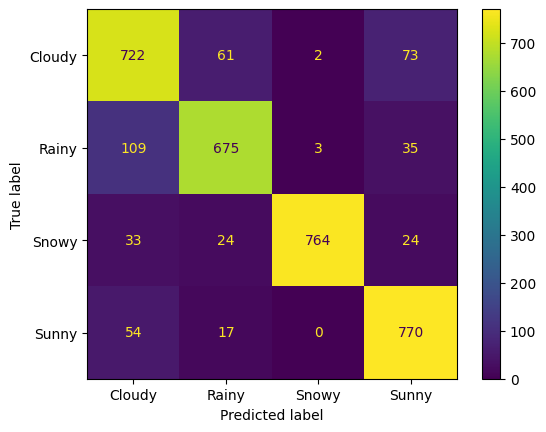

In [37]:
# Jawab disini
# Decision tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cf_display = ConfusionMatrixDisplay(confusion_matrix(ytest_c, dt_predictions_test), display_labels=dt.classes_)
cf_display.plot()



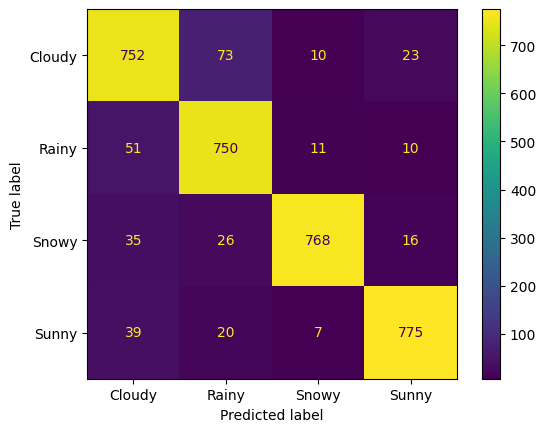

In [38]:
# Jawab disini
# Random forest

cf_display = ConfusionMatrixDisplay(confusion_matrix(ytest_c, rf_predictions_test), display_labels=rf.classes_)
cf_display.plot()

### **4.b Jelaskan bagaimana cara menghitung akurasi pada confusion matrix diatas untuk decision tree dan random forest, kalkulasi juga angkanya dan berikan juga formulanya (Sertakan sumber anda)**

### **Rumus Akurasi:**

Untuk menghitung **akurasi** dari *confusion matrix* pada model *decision tree* yang diberikan, kita perlu menggunakan rumus berikut:

$$
\text{Accuracy} = \frac{\text{TP + TN}}{\text{FP + FN + TP + TN}}
$$

Dalam konteks *confusion matrix* ini, "Jumlah prediksi benar" mengacu pada jumlah prediksi yang benar untuk setiap kelas, yang terletak di sepanjang diagonal matrix. Sedangkan "Total prediksi" adalah jumlah seluruh elemen dalam *confusion matrix*, yang merupakan jumlah dari semua prediksi (benar dan salah).

### Decision Tree:

$$
\text{Accuracy} = \frac{722 + 675 + 764 + 770}{722 + 61 + 2 + 73 + 109 + 675 + 3 + 35 + 33 + 24 + 764 + 24 + 54 + 17 + 0 + 770} = \frac{2931}{3366} = 0.8707
$$

### Random Forest:

$$
\text{Accuracy} = \frac{752 + 750 + 768 + 775}{752 + 73 + 10 + 23 + 51 + 750 + 11 + 10 + 35 + 26 + 768 + 16 + 39 + 20 + 7 + 775} = \frac{3045}{3366} = 0.9046
$$

### Kesimpulan:
Model *Random Forest* memiliki performa yang lebih baik daripada model *decision tree* karena memiliki akurasi yang lebih tinggi.


**Sumber**
- https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall

## No. 5

### **5.a Buat sebuah dataframe baru yang memiliki kolom weather type**

Dengan ketentuan seperti berikut :
*   Rainy -> Not Sunny
*   Cloudy -> Not Sunny
*   Sunny -> Sunny
*   Snowy -> Not Sunny

In [39]:
# Jawab Disini
df['Weather Type'] = df['Weather Type'].map({'Sunny': 'Sunny', 'Rainy': 'Not Sunny', 'Cloudy': 'Not Sunny', 'Snowy': 'Not Sunny'})

df


,ID,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,W9972,23.0,69,9.5,10.0,0,1012.91,9,1,8.5,1,Sunny
1,W501,29.0,82,18.0,78.0,3,991.54,3,1,4.0,1,Not Sunny
2,W9187,-2.0,74,3.0,74.0,3,982.42,0,0,2.5,1,Not Sunny
3,W6418,36.0,48,3.5,11.0,1,1024.92,10,3,5.5,2,Sunny
4,W5603,32.0,35,5.5,9.0,1,1010.24,6,2,9.0,0,Sunny
...,...,...,...,...,...,...,...,...,...,...,...,...
11215,W6427,75.0,70,35.5,99.0,3,1019.26,5,1,6.5,2,Not Sunny
11216,W4741,44.0,53,8.5,18.0,0,1023.11,5,3,9.5,0,Sunny
11217,W6885,22.0,80,13.5,75.0,3,1019.13,0,2,2.5,2,Not Sunny
11218,W7829,33.0,52,9.5,34.0,3,1001.71,4,3,7.0,1,Not Sunny


### **5.b Split df tersebut menjadi test dan training**

Dengan ketentuan:     
*   random state = 4
*   split dengan data testing sebanyak 20%


In [40]:
# Jawab disini
# Split X dan y disini
Xm = df.drop(columns=['Weather Type', 'ID'], axis=1)
ym = df['Weather Type']

display(Xm)
display(ym)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
0,23.0,69,9.5,10.0,0,1012.91,9,1,8.5,1
1,29.0,82,18.0,78.0,3,991.54,3,1,4.0,1
2,-2.0,74,3.0,74.0,3,982.42,0,0,2.5,1
3,36.0,48,3.5,11.0,1,1024.92,10,3,5.5,2
4,32.0,35,5.5,9.0,1,1010.24,6,2,9.0,0
...,...,...,...,...,...,...,...,...,...,...
11215,75.0,70,35.5,99.0,3,1019.26,5,1,6.5,2
11216,44.0,53,8.5,18.0,0,1023.11,5,3,9.5,0
11217,22.0,80,13.5,75.0,3,1019.13,0,2,2.5,2
11218,33.0,52,9.5,34.0,3,1001.71,4,3,7.0,1


0            Sunny
1        Not Sunny
2        Not Sunny
3            Sunny
4            Sunny
           ...    
11215    Not Sunny
11216        Sunny
11217    Not Sunny
11218    Not Sunny
11219    Not Sunny
Name: Weather Type, Length: 11220, dtype: object

In [41]:
# Jawab disini
# Split train dan test disini
Xtrain_cm, Xtest_cm, ytrain_cm, ytest_cm = train_test_split(X, y, test_size = 0.3, random_state = 2024)

display(Xtrain_cm)
display(ytrain_cm)

display(Xtest_cm)
display(ytest_cm)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
10971,36.0,63,5.5,17.0,0,1013.88,9,2,8.5,1
5503,27.0,43,7.5,5.0,0,1011.64,8,2,8.0,0
3185,22.0,99,18.5,82.0,1,1012.70,0,2,3.5,1
5004,34.0,89,12.0,62.0,1,1013.20,1,1,2.5,1
2052,36.0,81,8.0,97.0,0,1014.11,10,1,9.5,0
...,...,...,...,...,...,...,...,...,...,...
2494,14.0,81,6.5,82.0,3,1010.85,0,1,2.0,0
2688,11.0,66,6.0,49.0,1,1015.45,3,1,5.0,0
2656,12.0,85,9.5,68.0,3,1018.13,2,3,2.0,1
3578,33.0,65,0.5,5.0,1,1024.20,6,2,8.5,1


10971     Sunny
5503      Sunny
3185     Cloudy
5004      Rainy
2052      Sunny
          ...  
2494      Rainy
2688     Cloudy
2656      Rainy
3578      Sunny
7816      Rainy
Name: Weather Type, Length: 7854, dtype: object

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
5390,33.0,88,15.0,98.0,1,1002.06,3,0,4.5,0
8956,41.0,65,3.0,9.0,0,1021.47,5,0,7.5,1
6322,27.0,102,5.5,74.0,1,1016.58,6,1,6.0,1
6315,26.0,56,3.5,1.0,1,1017.04,10,3,8.0,2
1806,12.0,50,3.5,25.0,3,1016.78,1,2,6.0,1
...,...,...,...,...,...,...,...,...,...,...
4231,21.0,57,2.0,67.0,2,823.08,7,1,7.5,2
1201,-12.0,68,4.0,76.0,3,1052.90,3,3,11.0,1
9697,30.0,86,11.0,63.0,3,1016.40,1,1,5.0,1
6802,24.0,63,1.0,44.0,3,1016.04,4,0,6.0,2


5390     Rainy
8956     Sunny
6322    Cloudy
6315     Sunny
1806    Cloudy
         ...  
4231     Snowy
1201     Sunny
9697     Rainy
6802    Cloudy
9460     Rainy
Name: Weather Type, Length: 3366, dtype: object

### **5.c Buatlah model random forest dan decision tree dari split df tersebut**
Dengan ketentuan:

Decision Tree :     
*   random_state = 2024

Random Forest :      
*   n_estimators = 150
*   random_state = 2024

In [42]:
# Jawab Disini
dtm = DecisionTreeClassifier(random_state=2024)
rfm = RandomForestClassifier(random_state=2024, n_estimators=150)
dtm.fit(Xtrain_cm, ytrain_cm)
rfm.fit(Xtrain_cm, ytrain_cm)

display(dtm)
display(rfm)

DecisionTreeClassifier(random_state=2024)

RandomForestClassifier(n_estimators=150, random_state=2024)

### **5.d Prediksi dataset testing dengan menggunakan model decision tree dan random forest yang sudah dibuat dan perlihatkan metrik-metrik seperti accuracy, recall, F1 score, precision**

**PERHATIAN UNTUK TIDAK MENGGUNAKAN FUNGSI classification_metrics() KARENA METRIK TERSEBUT HANYA DAPAT DIGUNAKAN UNTUK MULTILABEL CLASSIFICATION SEDANGKAN CASE SAAT INI MERUPAKAN BINARY CLASSIFICATION, SEHINGGA BUAT SENDIRI KODE ANDA JANGAN MENGGUNAKAN FUNGSI TERSEBUT.**  

In [43]:
# Jawab disini
# Prediksi random forest dan decision tree
dtm_predictions_test = dtm.predict(Xtest_cm)
rfm_predictions_test = rfm.predict(Xtest_cm)

In [44]:
# Jawab disini
# Metrik Decision tree
classification_metrics(dtm_predictions_test, ytest_cm)

Accuracy: 0.9084967320261438
F1 Score: 0.9084480394815402
Recall Score: 0.908470027358733
Precision Score: 0.908433109712941


In [45]:
# Jawab Disini
# Metrik Random Forest
classification_metrics(rfm_predictions_test, ytest_cm)

Accuracy: 0.9156268568033273
F1 Score: 0.9156545175061943
Recall Score: 0.9155788642301049
Precision Score: 0.9157745391014716


### **5.e Buatlah confusion matrix untuk decision tree dan random forest yang baru saja dibuat**

**PERHATIAN ANDA HARUS MEN-DEFINE KELAS POSITIFNYA DAN NEGATIFNYA UNTUK MEMBUAT CONFUSION MATRIX YANG BENAR**  

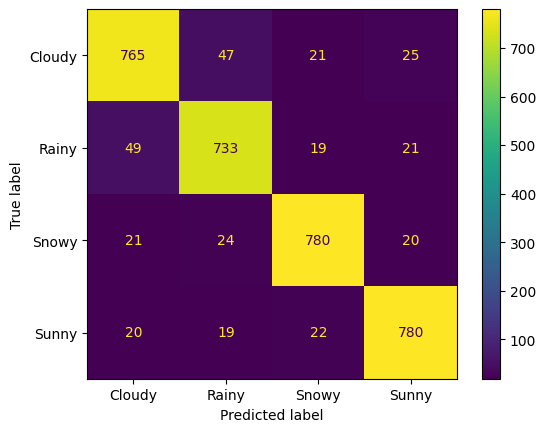

In [46]:
# Jawab disini
# Decision tree

cf_display = ConfusionMatrixDisplay(confusion_matrix(ytest_cm, dtm_predictions_test), display_labels=dtm.classes_)
cf_display.plot()

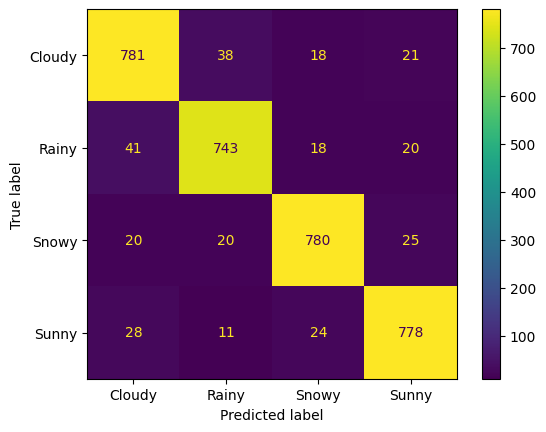

In [47]:
# Jawab disini
# Random forest

cf_display = ConfusionMatrixDisplay(confusion_matrix(ytest_cm, rfm_predictions_test), display_labels=rfm.classes_)
cf_display.plot()

### **5.f Hitunglah secara manual untuk metrik metrik seperti accuracy, F1 score, recall score, precision score berikan juga cara anda mendapatkan dan berikan juga formulanya untuk kedua model yang baru saja dibuat (Anggap Sunny sebagai case positif) (Sertakan sumber anda)**  

**Rumus Akurasi**:

$$Accuracy = \frac{TP + TN}{TP+TN+FP+FN}$$

**Rumus F1-Score**:

$$F1Score = 2\times\frac{Precission \times Recall}{Precission + Recall}$$

**Rumus Recall**:

$$Recall = \frac{TP}{TP+FN}$$

**Rumus Precision**:

$$Precision = \frac{TP}{TP+FP}$$

--- 

### Decision Tree

- $Accuracy = \frac{1621+517}{1621+65+41+517} = \frac{2138}{2244} = 0.9528 = 95.28\%$


- $Recall = \frac{517}{517+41} = \frac{517}{558} = 0.9265 = 92.65\%$


- $Precission = \frac{517}{517+65} = \frac{517}{582} = 0.8883 = 88.83\%$


- $F1Score = 2\times\frac{0.8883 \times 0.9265}{0.8883 + 0.9265} = 0.9070 = 90.70\%$

--- 

### Random Forest

- $Accuracy = \frac{1679+502}{1679+7+56+502} = \frac{2181}{2244} = 0.9719 = 97.19\%$


- $Recall = \frac{502}{502+56} = \frac{502}{558} = 0.8996 = 89.96\%$


- $Precission = \frac{502}{502+7} = \frac{502}{509} = 0.9862 = 98.62\%$


- $F1Score = 2\times\frac{0.9862 \times 0.8996}{0.9862 + 0.8996} = 0.9409 = 94.09\%$

Sumber:

- https://https://cohere.com/blog/classification-eval-metrics

### **5.g Mengapa rumus yang digunakan untuk menghitung metrik pada multi-class classification dengan binary berbeda? dan berikan contoh metrik yang rumusnya sama dalam multi-class classification dan binary. (Sertakan sumber anda)**

Karena pada multi class specification terdapat banyak kelas, sehingga untuk rumus recall, precision, dan f1-score akan berbeda dengan binary classification. Masing-masing kelas akan diperlakukan bak pilihan biner, hal ini membuat confusion matrix menjadi lebih besar. Contoh metrik yang rumusnya sama dalam multi-class classification dan binary adalah akurasi. Akurasi pada multi-class classification dan binary classification memiliki rumus yang sama, yaitu jumlah prediksi yang benar dibagi dengan jumlah total prediksi.

$$Accuracy = \frac{TP + TN}{TP+TN+FP+FN}$$

### **5.h Terdapat dua averaging yang dapat digunakan pada metrik-metrik multi-class yaitu macro dan micro, apakah perbedaan dari averaging tersebut? dan averaging apa yang sebaiknya digunakan jika terdapat label imbalance? lalu jelaskan apa label imbalance. (Sertakan sumber anda)**

**Jawab Disini**

- Mada macro averaging, kita menghitung metrik untuk setiap kelas dan kemudian menghitung rata-rata dari metrik tersebut. Sedangkan pada micro averaging, kita menghitung metrik dengan menghitung jumlah True Positive, False Positive, dan False Negative dari semua kelas dan kemudian menghitung metrik tersebut. Macro averaging memberikan bobot yang sama untuk setiap kelas, sedangkan micro averaging memberikan bobot yang sama untuk setiap prediksi.

$$\text{Macro-Averaged Metric} = \frac{1}{n}\sum_{i=1}^{n} \text{Metric}_{i}$$

***Label imbalance*** terjadi ketika distribusi kelas tidak seimbang, yaitu ketika jumlah sampel dalam satu kelas lebih banyak daripada kelas lainnya. Ketika terjadi label imbalance, sebaiknya menggunakan micro averaging. Hal ini dikarenakan micro averaging memberikan bobot yang sama untuk setiap prediksi, sehingga dapat mengatasi label imbalance.

Micro averaging memastikan bahwa model memrediksi benar secara keseluruhan. Macro averaging memberikan bobot yang sama untuk setiap kelas. Jika data imbalance, **macro-averaging** sering dipilih untuk memastikan model tidak bergantung pada kelas mayoritas saja.

**Sumber**
- https://datascience.stackexchange.com/questions/85981/micro-average-vs-macro-average-for-class-imbalance
- https://www.educative.io/answers/what-is-the-difference-between-micro-and-macro-averaging

## No.6

### **6.a Terdapat dua alasan mengapa decision tree tidak dapat mendapatkan leaf node yang sempurna (Contohnya di node tersebut masih terdapat data yang positif dan negatif), jika ada lebih dari 2 alasan tidak masalah. (Sertakan sumber anda)**

1. terdapat tumpang tindih antara kelas positif dan negatif pada fitur yang sama, sehingga model tidak dapat memisahkan kelas dengan baik.
2. terdapat data yang outlier sehingga model tidak dapat memisahkan kelas dengan baik.
3. terdapat noise yang tejadi secara alami, hal ini menyebabkan model tidak akan 100% akurat dalam memisahkan kelas.

**Sumber**
- https://machinelearningmodels.org/understanding-the-role-of-decision-tree-nodes-in-machine-learning/

### **6.b Decision tree merupakan salah satu algoritma yang sangat sensitif dengan perubahan data, mengapa demikian? dan bagaimana random forest dapat menyelesaikan masalah tersebut? (Sertakan sumber anda)**

dalam decision tree, setiap butir data digunakan untuk menentukan splitting point. Jika terdapat perubahan data, maka splitting point akan berubah. Hal ini menyebabkan decision tree sangat sensitif terhadap perubahan data. Random forest dapat menyelesaikan masalah ini dengan cara menggabungkan beberapa decision tree. Dengan menggabungkan beberapa decision tree, random forest dapat mengurangi sensitivitas terhadap perubahan data. seperti halnya distribusi normal, rerata dari beberapa decision tree akan cenderung mendekati rerata dari populasi.


**Sumber**
- https://www.geeksforgeeks.org/decision-tree/
- https://www.gyansetu.in/blog/decision-trees-advantages-and-disadvantages/
- https://dataheadhunters.com/academy/decision-trees-vs-random-forests-comparing-predictive-power/

## No. 7

In [48]:
# KODE INI JANGAN DIUBAH
df_r = pd.read_csv("Admission_Predict_Ver1.1.csv")
df_r
# KODE INI JANGAN DIUBAH

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


### **7.a Split dataset diatas, train dengan menggunakan random forest dan decision tree, dan tampilkan metrik regresinya berdasarkan dataset testing. Berikut merupakan ketentuannya :**

Split
*   data target : Chance of Admit
*   random state : 2025
*   rate split dengan training : 60/40

Decision Tree
*   max_depth = 5
*   random_state = 2025

Random Forest :      
*   max_depth = 5
*   n_estimators = 150
*   random_state = 2025

In [49]:
# Kode split anda disini
X_r = df_r.drop(columns=['Chance of Admit ', 'Serial No.'], axis=1)
y_r = df_r['Chance of Admit ']

X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(X_r, y_r, test_size=0.4, random_state=2025)

In [50]:
# Train decision tree disini
dt_r = DecisionTreeRegressor(max_depth=5,random_state=2025)
dt_r.fit(X_r_train, y_r_train)

DecisionTreeRegressor(max_depth=5, random_state=2025)

In [51]:
# Train random forest disini

rf_r = RandomForestRegressor(max_depth=5,n_estimators=150,random_state=2025)
rf_r.fit(X_r_train, y_r_train)

RandomForestRegressor(max_depth=5, n_estimators=150, random_state=2025)

In [52]:
# Tampilkan metrik regresi decision tree disini
dt_r_pred_test = dt_r.predict(X_r_test)
regression_metrics(dt_r_pred_test, y_r_test)

MAE: 0.05293969206719206
MSE: 0.0054568055536558056
RMSE: 0.0738701939462447


In [53]:
# Tampilkan metrik regresi random forest disini
rf_r_pred_test = rf_r.predict(X_r_test)
regression_metrics(rf_r_pred_test, y_r_test)

MAE: 0.04699303433722683
MSE: 0.004040059564147692
RMSE: 0.0635614628855228


### **7.b Berdasarkan regression metrics yang ada, jelaskan arti dari setiap metrik tersebut, kegunaan masing-masing metrik, serta rumus-rumus yang digunakan untuk menghitungnya. Setelah itu, analisis dan jelaskan mengapa Root Mean Square Error (RMSE) lebih sering digunakan dibandingkan Mean Square Error (MSE) dalam evaluasi model regresi. Sertakan sumber referensi yang mendukung penjelasan Anda.**


Mean Absolute Error (MAE) adalah metrik yang paling sederhana dan mudah dipahami. MAE dihitung dengan mengambil rata-rata dari nilai absolut selisih antara nilai prediksi dan nilai aktual. MAE memberikan informasi tentang seberapa dekat prediksi dengan nilai aktual secara rata-rata. MAE memberikan bobot yang sama pada kesalahan kecil dan besar. MAE merupakan metrik yang paling sering digunakan dalam analisis regresi karena mudah untuk diinterpretasikan.

$$MAE = \frac{1}{n} \sum_{i=1}^{n}|y_i-\hat{y}_i|$$

Mean Squared Error (MSE) dihitung sebagai rata-rata dari selisih kuadrat antara nilai aktual dan nilai prediksi. MSE mengukur seberapa dekat prediksi dengan nilai aktual secara rata-rata, tetapi memberikan bobot lebih besar pada kesalahan yang besar dibandingkan kesalahan yang kecil. Ini berarti MSE lebih sensitif terhadap outlier, daripada MAE.

$$MSE = \frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y}_i)^2$$

Root Mean Squared Error (RMSE) adalah nilai akar kuadrat dari MSE. RMSE memiliki satuan yang sama dengan nilai sebenarnya dan prediksi, sehingga memudahkan perbandingan antara keduanya. Selain itu, RMSE memberikan perhatian lebih pada kesalahan yang lebih besar dibandingkan dengan kesalahan kecil. RMSE merupakan salah satu metrik yang paling sering digunakan dalam analisis regresi karena mudah untuk dihitung dan cocok untuk dioptimalkan dengan metode berbasis gradien.

$$RMSE = \sqrt{(\frac{1}{n} \sum_{i=1}^{n}(y_i-\hat{y}_i)^2}$$

RMSE seringkali lebih dipilih daripada MSE karena RMSE memberikan informasi yang lebih mudah dipahami. RMSE memiliki unit yang sama dengan data asli, sehingga lebih mudah untuk diinterpretasikan. Selain itu, RMSE lebih sensitif terhadap kesalahan besar dibandingkan MSE, sehingga RMSE lebih baik dalam mengidentifikasi model yang membuat kesalahan besar.

# Kaggle Competition!

Dalam rangka menerapkan pemahaman kalian pada materi CART dan sebagai sarana untuk berlatih, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 4 ini.

**Bagaimana Cara Mengikuti?**
*   Kalian akan menemukan tautan ke kompetisi di bagian bawah section ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
*   Kerjakan solusi Anda menggunakan notebook ini.
*   Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.

**Tautan Kaggle Competition**
*   [Kaggle Competition Classification Case](https://www.kaggle.com/competitions/klasifikasi-lab-4-classification-cart)

**Penilaian**

Untuk mendapatkan nilai penuh pada lab 4 ini, kalian **diwajibkan** untuk mengikuti kedua kompetisi kaggle di atas.


In [54]:
df = pd.read_csv("weather_train.csv")

categorical_columns = {
    'Cloud Cover': {'clear': 0, 'partly cloudy': 1, 'cloudy': 2, 'overcast': 3},
    'Season': {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3},
    'Location': {'coastal': 0, 'inland': 1, 'mountain': 2}
}


for col in categorical_columns:
    df[col] = df[col].map(dict(categorical_columns[col]))

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

X = df.drop(columns=['Weather Type', 'ID'], axis=1)
Y = df['Weather Type']

rf = RandomForestClassifier(random_state=2025)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV untuk Random Forest
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X, Y)

best_rf = grid_search_rf.best_estimator_

dft = pd.read_csv("weather_test.csv")

for col in categorical_columns:
    dft[col] = dft[col].map(dict(categorical_columns[col]))

id = dft['ID']
dft.drop(['ID'], axis=1, inplace=True)

prediction = best_rf.predict(dft)

dfs = pd.DataFrame()
dfs['ID'] = id
dfs['Weather Type'] = prediction

dfs.to_csv('weather_submission.csv', index=False)
